# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [3]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [4]:
# YOUR CODE HERE

# Note that X.shape is (70,)
# In the spirit of minimizing gloabl namespace, define functions to add bias vector

# First define a function to create a vector of ones: 
def create_bias_vec(num_examples):
    """  
    Returns a NumPy array of ones of shape (num_examples, )
    Args:
        num_examples 
    """
    return np.ones(shape=num_examples)

# Then define a function that adds the vector of ones to the input matrix
def concat_bias_vec(input_without_bias):
    """  
    Return an input matrix (m - 1, n) array the bias vector of ones
    In this homework problem n = 2
    Args:
        the input matrix (m - 1, n - 1) where there are m examples and n features including the bias
    """
    return np.stack(arrays=(create_bias_vec(input_without_bias.shape[0]), input_without_bias),
             axis=1)

# Print out the shape of the augmented input array            
X = concat_bias_vec(X)
print("Shape of X:", X.shape)
print(f"First 5 rows of X after concat:\n{X[0:5,:]}")

Shape of X: (70, 2)
First 5 rows of X after concat:
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [5]:
# YOUR CODE HERE

# Split (X, Y) using the train_test_split() function
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=1234)

# Print out split outptu
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)



X_train shape: (56, 2)
X_test shape: (14, 2)
Y_train shape: (56,)
X_test shape: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

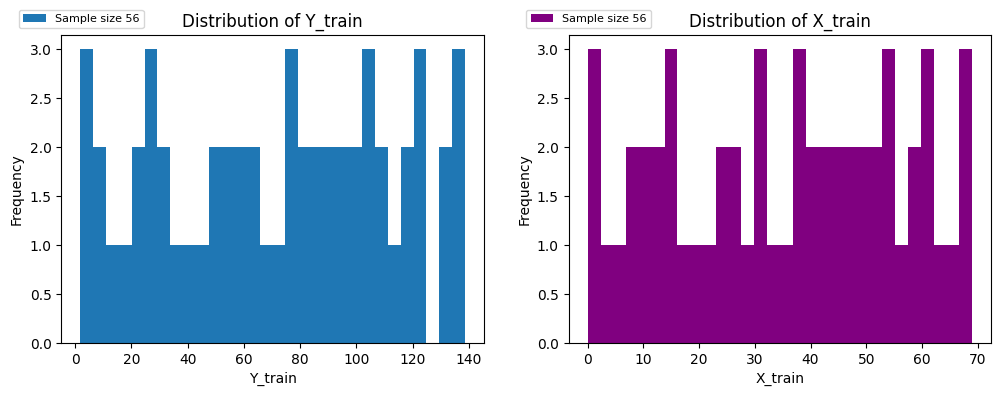

In [6]:
# YOUR CODE HERE

# By side-by-side, I assume a 1-by-2 subplots is the desired layout.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the histograms
ax[0].hist(Y_train,
           bins=30,
           label=f"Sample size {Y_train.shape[0]}")
ax[1].hist(X_train[:,1],
           bins=30,
           color='purple',
           label=f"Sample size {X_train.shape[0]}")

# Add labels for axes
ax[0].set_xlabel("Y_train")
ax[1].set_xlabel("X_train")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

# Add title
ax[0].set_title("Distribution of Y_train")
ax[1].set_title("Distribution of X_train")

ax[0].legend(loc=(-0.1, 1.02),
             fontsize=8)
ax[1].legend(loc=(-0.1, 1.02),
             fontsize=8)
plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [7]:
# YOUR CODE HERE

# First creating the weights vector for each model
W1 = np.array([5, 1])
W2 = np.array([1, 2])

# Define a function that compute predictions given input and weights
def model_prediction(input_array, W):
    """  
    Return (n,) np array predicted values
    Args:
        W: (m,) array representing weights.
        input_array: (n, m) array where n is the number of examples
            and m is the number of features including the bias
    """
    return np.dot(input_array, W)

# Compute predictions
M1_hat_train = model_prediction(X_train, W1)
M2_hat_train = model_prediction(X_train, W2)

# Check the shapes are consistent
print("M1_hat_train shape:", M1_hat_train.shape)
print("M2_hat_train shape:", M2_hat_train.shape)
print(50*"*")
print("Y_train shape:", Y_train.shape)

M1_hat_train shape: (56,)
M2_hat_train shape: (56,)
**************************************************
Y_train shape: (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [8]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W. 
    predictions = model_prediction(inputs, W)
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = (1 / m) * np.square(diff).sum()
    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]

    # 'inputs' is m (num_examples) by n (num_features)
    # Output is n by 1
    gradient = inputs.T @ (inputs @ W - outputs)

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

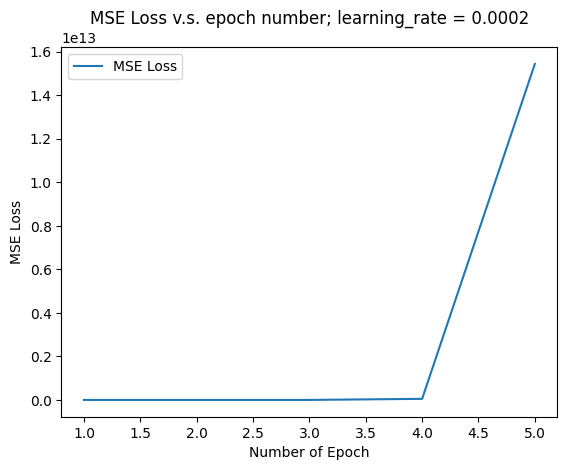

In [9]:

# Running the code with given hyperparameters
gradient_descent_output = gradient_descent(X_train, Y_train, 0.0002, 5)

# Plot loss against epochs
fig, ax = plt.subplots()

# The number of epochs in plt.plot() is given by num_epochs (= gradient_descent_output[0].shape[0])
plt.plot(np.arange(1, gradient_descent_output[0].shape[0] + 1), 
         gradient_descent_output[1],
         label="MSE Loss")

# Set title
ax.set_title("MSE Loss v.s. epoch number; learning_rate = 0.0002")

# Set labels
ax.set_xlabel("Number of Epoch")
ax.set_ylabel("MSE Loss")

# Add legend showing hyperparameters
ax.legend()

## Exercise 5 and the plot above, comment

Given the hyperparameters, loss blows up and the shape of the loss function is so because the loss increase between epochs 4 and 5 are particularly large compared with previous epochs.

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

## Exercise 6 Answers and Comments

### 1. I do not think increasing learning_rate from 0.002 to 0.02 is beneficial in this particular case. As shown below, when learning rate is increased to 0.02, the rate of **divergence** is even greater.

### 2. Again, using the given hyperparameters, increasing the number of epochs (also shown in the plot below) would lead to a greater loss. **However**, I further explored more hyperparameters and one configuration converged in less than 20 epochs. In that case, increasing the number of epochs and see big improvements.

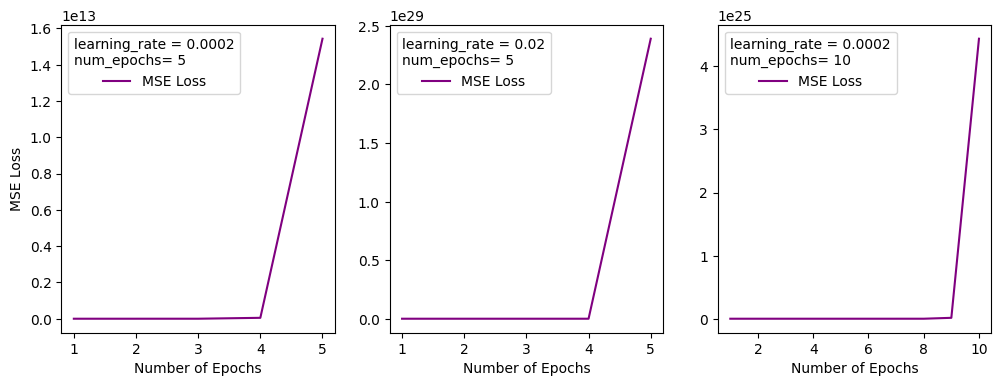

In [10]:
# YOUR CODE HERE

# Store hyperparameters in a list
hyperparameter_list = [[0.0002, 5],
                       [0.02, 5],
                       [0.0002, 10]]

# Plot
fig, ax = plt.subplots(1, len(hyperparameter_list),
                       figsize=(12, 4))


# Loop through configurations and plot the loss for each
for i, row in enumerate(hyperparameter_list):
    ax[i].plot(np.arange(1, row[1] + 1),
               gradient_descent(X_train, Y_train, 
                                learning_rate=row[0],
                                num_epochs=row[1])[1],
                label="MSE Loss",
                color="purple")

    ax[i].set_xlabel("Number of Epochs")
    ax[i].legend(title=f'learning_rate = {hyperparameter_list[i][0]}\nnum_epochs= {hyperparameter_list[i][1]}')
# I add only one y-axis label for the 3 subplots for aesthetic/practical reasons
ax[0].set_ylabel("MSE Loss")
plt.show()



## The next code cell is **NOT ASKED** in the question statement but I plot it for my own benefit

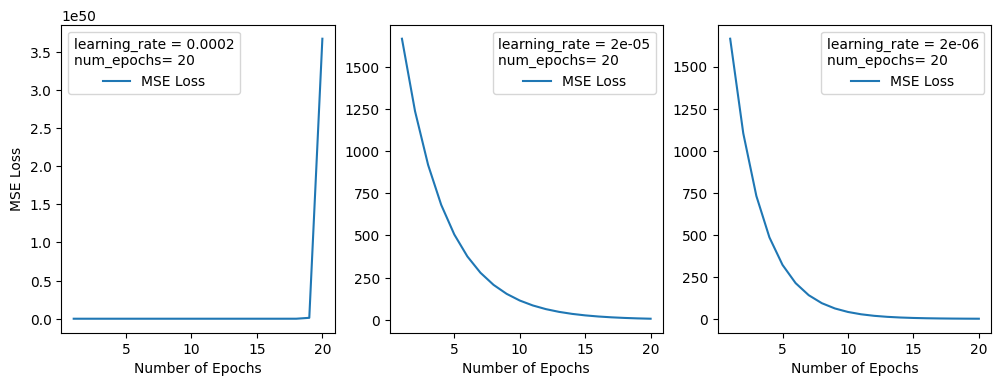

In [11]:

# Since the given hyperparameters all blow the loss function up, I added a new set of hyperparameters

hyperparameter_list = [[0.0002, 20],
                       [0.00002, 20],
                       [0.000002, 20]]

fig, ax = plt.subplots(1, len(hyperparameter_list),
                       figsize=(12, 4))

for i, row in enumerate(hyperparameter_list):
    ax[i].plot(np.arange(1, row[1] + 1),
               gradient_descent(X_train, Y_train, 
                                learning_rate=row[0],
                                num_epochs=row[1])[1],
                label="MSE Loss")
    ax[i].set_xlabel("Number of Epochs")
    ax[i].legend(title=f'learning_rate = {hyperparameter_list[i][0]}\nnum_epochs= {hyperparameter_list[i][1]}')
ax[0].set_ylabel("MSE Loss")
plt.show()

## Exercise 6 Comments Part 2

### In this case, the last (on the right) configuration leads to convergence and it is beneficial to increase num_epochs from 5 to 10.

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

## There was some ambiguity about whether or not *we can* explore more configurations outside the ones given in the problem statement. I proceed with the assumption that we can. 

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [12]:
# YOUR ANSWER HERE

# I assume in this exercise, 'best' is in the sense of training (not generalizing).
history = gradient_descent(X_train, Y_train,
                 learning_rate=0.000002,
                 num_epochs=20)
#$$gradient_descent$$
#history.shape
best_weights = history[0][-1]
best_weights[0]
print(f'The best model is M_3 = {best_weights[0]:.3f} + {best_weights[1]:.3f}x.')

The best model is M_3 = 1.021 + 1.981x.


## Comment: Best Model

The best model, if we are allowed to explore just a little beyond the given hyperparameters, is given by
$$ learning\_rate = 0.000002 $$
$$ num\_epochs = 20$$

### But if limited to the given hyperparameters:
$$ learning\_rate = 0.002 $$
$$ num\_epochs = 5$$
Although all three parameter combinations (in the given hyperparameters) blow loss up, **best** can be determined from the one that has the smallest loss; however, in this case, the number of epoch that results in the smallest loss is the first epoch. This doesn't make good sense. So I picked the **weights learned from** the first set of hyperparameters (in this markdown cell) to be the best model.

---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [13]:
# YOUR CODE HERE

# Recall we've already defined W1 (weights for model 1) and W2.

# Print the weights for M1, M2, and M3 for convenience
print("3 sets of weights for W1, W2, and W3")
print(W1)
print(W2)
print(best_weights)

# Compute mean_squared_error of the 3 models from the training 
MSE_M1_train = mean_squared_error(y_true=Y_train,
                   y_pred=model_prediction(X_train, 
                                           W1))
MSE_M2_train = mean_squared_error(y_true=Y_train,
                   y_pred=model_prediction(X_train, 
                                           W2))
MSE_M3_train = mean_squared_error(y_true=Y_train,
                   y_pred=model_prediction(X_train, 
                                           best_weights))
                                        
# Print out results                                    
print(50*"*")

print(f"M1 MSE on TRAIN: {MSE_M1_train:.2f}")                                    
print(f"M2 MSE on TRAIN: {MSE_M2_train:.2f}")                                    
print(f"M3 MSE on TRAIN: {MSE_M3_train:.2f}")                                    



3 sets of weights for W1, W2, and W3
[5 1]
[1 2]
[1.02096335 1.98070032]
**************************************************
M1 MSE on TRAIN: 1397.61
M2 MSE on TRAIN: 0.33
M3 MSE on TRAIN: 0.99


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [14]:
# YOUR CODE HERE

# To find which model generalizes better, MSE is computed for each model on 'test' 
MSE_M1_test = mean_squared_error(y_true=Y_test,
                                y_pred=model_prediction(X_test, W1))
MSE_M2_test = mean_squared_error(y_true=Y_test,
                                y_pred=model_prediction(X_test, W2))
MSE_M3_test = mean_squared_error(y_true=Y_test,
                                y_pred=model_prediction(X_test, best_weights))
                                        
# Print out results                                        
print("Test:")
print(f"M1 MSE on TEST: {MSE_M1_test:.2f}")                                    
print(f"M2 MSE on TEST: {MSE_M2_test:.2f}")                                    
print(f"M3 MSE on TEST: {MSE_M3_test:.2f}")                                    


# Print out training loss too for reference
print(50*"*")
print("Train loss for referenc3:")
print(f"M1 MSE on TRAIN: {MSE_M1_train:.2f}")                                    
print(f"M2 MSE on TRAIN: {MSE_M2_train:.2f}")                                    
print(f"M3 MSE on TRAIN: {MSE_M3_train:.2f}")                                    


# See markdown cell below for answers and comments 

Test:
M1 MSE on TEST: 1113.60
M2 MSE on TEST: 0.29
M3 MSE on TEST: 0.71
**************************************************
Train loss for referenc3:
M1 MSE on TRAIN: 1397.61
M2 MSE on TRAIN: 0.33
M3 MSE on TRAIN: 0.99


## Exercise 9 comments

### If we consider the fact that M3 has a smaller MSE in test than in training, and M3 MSE (both train and test) is overall small (<1), M3 generalizes very well. 

### Based on MSE on test (and in comparison with train), M2 (given by W = (1, 2)') generalizes better in the sense that M2's test loss is the smallest (0.33), only slightly larger than train loss (0.29). But M3 from gradient descent comes as a close second with test MSE 0.99.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [15]:
# YOUR ANSWER HERE
# 1. SGD compute gradient (n by 1) using just 1 (as opposed to m) examples.
# To implement SGD, one method is to use the one-example deriviation in the helper file 
# instead of the matrix-form gradient.

# Another method is to randomly choose one row of the input matrix and also the same row of the Y vector
# It seems that SGD converges more rapidly. 

In [16]:
# YOUR CODE HERE

# Implement a stochastic gradient descent function
def stochastic_gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W. 
    predictions = model_prediction(inputs, W)
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = (1 / m) * np.square(diff).sum()
    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]

    # Here 

    row_num = np.random.randint(0, inputs.shape[0])
    gradient = np.ravel(inputs[row_num,].reshape(-1,1) * (inputs[row_num, ] @ W - outputs[row_num,]))

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

In [17]:
# 
stochastic_gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=18)

(array([[1.        , 1.        ],
        [1.00058907, 1.00117815],
        [1.01273669, 1.73003483],
        [1.01598964, 1.92846526],
        [1.01650527, 1.94651218],
        [1.01649872, 1.94644009],
        [1.01676916, 1.94968538],
        [1.0171588 , 1.96682977],
        [1.01735771, 1.96722759],
        [1.01788864, 1.99695982],
        [1.01775912, 1.99514642],
        [1.0179623 , 2.00530564],
        [1.01805985, 2.00628114],
        [1.01801784, 2.00426444],
        [1.01787562, 1.99758022],
        [1.01777427, 1.99220883],
        [1.01770898, 1.9878345 ],
        [1.01760404, 1.9873098 ]]),
 array([1.66536666e+03, 1.66140837e+03, 1.22179536e+02, 9.01688537e+00,
        5.21869174e+00, 5.23172662e+00, 4.66221245e+00, 2.23890725e+00,
        2.19381803e+00, 3.48649030e-01, 3.77062823e-01, 3.59026464e-01,
        3.75379748e-01, 3.45104165e-01, 3.41460669e-01, 4.46196417e-01,
        6.02351759e-01, 6.25454377e-01]))